# Fast Fourier Transform

[MIT Open Courseware Lecture](https://www.youtube.com/watch?v=iTMn0Kt18tg&t=88s&ab_channel=MITOpenCourseWare)

[Markdown Cheatsheet](https://rpruim.github.io/s341/S19/from-class/MathinRmd.html)

[Python wave package (.wav files)](https://docs.python.org/3/library/wave.html)

[WAVE PCM soundfile format](http://soundfile.sapp.org/doc/WaveFormat/)

- Example of a divide an conquer algorithm
- used all the freaking time. Especially digital and signal processing

\begin{align*}
&Various\ Representations\ of\ Polynomials\ with\ n\ Terms\\
\\
&A(x) = a_0 + a_1x + a_2x^2 +... + a_nx^{n-1}& &Algebraic&\\
&\sum_{k=0}^{n-1} a_kx^k& &Summation& \\
&\langle a_0, a_1, a_2, ..., a_{n-1} \rangle & &Vector\ of\ real\ numbers&\\
\end{align*}


# Operations on Polynomials

## Evaluation, O(n)
Given function $A(x)$ and an $x_0$, compute $A(x_0)$

#### Use Horner's Rule 
Evaluation method. O(n).

## Addition, O(n)
Given $A(x)$ & $B(x)$,

Calculate $C(x)$ $|$ $C(x) = A(x) + B(x)$, $\forall x$

$\sum_{k=0}^{n-1}C(x_k) = \sum_{k=0}^{n-1}A(x_k) + \sum_{k=0}^{n-1}B(x_k)$, which is O(2*n) = O(n)

## Multiplication, O(nlogn)
Tricky.

Given $A(x_k)$ & $B(x_k)$,

Calculate $C(x_k)$ $|$ $C(x_k) = A(x_k) \cdot  B(x_k)$

The time spent in a dot product is equivalent to convolution.

## Reading in .wav file with Numpy

#### download free opensource piano WAVE file:

`curl -o piano.wav  'https://cdn.freesound.org/sounds/678/678568-e6e4a755-0846-485b-8
c17-ffedace51c0b?filename=678568__josefpres__piano-loops-082-octave-down-short-loop-120-bpm.wav'`

#### Documentation for [np.fromfile](https://numpy.org/doc/stable/reference/generated/numpy.fromfile.html)
#### Documentation for [wave library](https://docs.python.org/3/library/wave.html)
#### Documentation for [Buffer Protocol](https://docs.python.org/3/c-api/buffer.html) on simple objects like bytes arrays
#### Documentation for [matplotlib.pyplot.figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
#### Excellent Video on [how to plot audio signal in plt](https://www.youtube.com/watch?v=n2FKsPt83_A&ab_channel=AssemblyAI)


In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

audio_file = 'piano.wav'

According to the RIFF WAV format, make sure the first 4 bytes starts with the characters 'RIFF' in ASCII.

In [2]:
def to_byte(boolean):
    return boolean*8

In [3]:
# Reads in the WAVE file's binary header which is 44 bytes
header = np.fromfile(audio_file, dtype=bool, offset=0, count=8*44)

In [4]:
# Converts np array to binary ascii representation
# first 4 bytes should say 'RIFF' in ASCII as per The Canonical WAVE file format
header[0:4].tobytes().decode('ascii')

'RIFF'

In [5]:
with wave.open(audio_file, 'rb') as fp:
    num_chan = fp.getnchannels() # Returns number of audio channels (1 for mono, 2 for stereo).
    samp_width = fp.getsampwidth() # Returns sample width in bytes.
    frame_rate = fp.getframerate() # Returns sampling frequency.
    num_frames = fp.getnframes() # Returns number of audio frames.
    comp_type = fp.getcomptype() # Returns compression type ('NONE' is the only supported type).
    frames = fp.readframes(-1) # Reads and returns at most n frames of audio, as a bytes object.
    fp.rewind() # Rewind the file pointer to the beginning of the audio stream.

In [6]:

x = np.arange(16)

x[4:9:2]

array([4, 6, 8])

In [7]:
# account for stereo channel(s). channel values are adjoining.
if num_chan == 2:
    channels = np.frombuffer(frames, dtype=np.int16) # I want to say that wave module only supports a bit depth of 16 bits?
    channel_1 = channels[::2] # evven numbered rows
    channel_2 = channels[1::2] # odd numbered rows
    # print(len(channel_1))
    # print(len(channel_2))
else:
    channel_1 = np.frombuffer(frames, dtype=np.int16)
    # print(len(channel_1))


In [8]:
# note that number of frames assumes you've already converted to the correct number of channels.

total_time = num_frames/frame_rate # length of audio in seconds
total_time

34.0

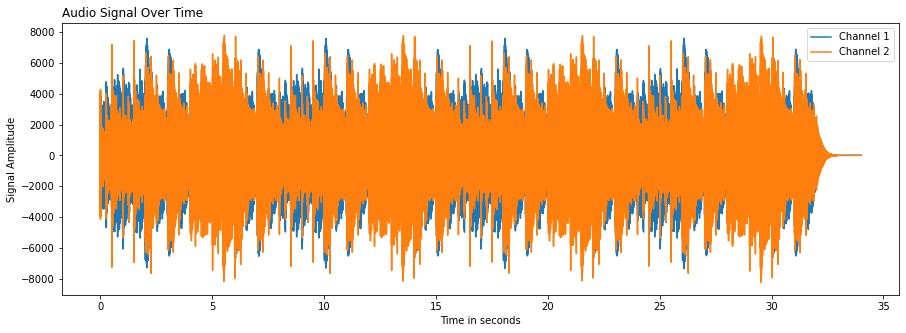

In [18]:
t = np.linspace(0, total_time, num=num_frames) # time axis, total time samples 0 --> t

plt.figure(figsize=(15,5))
plt.ylabel("Signal Amplitude")
plt.xlabel("Time in seconds")

if num_chan == 2:
    plt.plot(t, channel_1, label='Channel 1') 
    plt.plot(t, channel_2, label='Channel 2')
elif num_chan == 1:
    plt.plot(t, channel_1, label='Channel 1')
else:
    raise ValueError("Input channel does not equal 1 or 2. Only Mono and Sterio Channels are supported.")


plt.legend()
plt.title("Audio Signal Over Time", loc = 'left')

#plt.xlim()
plt.show()



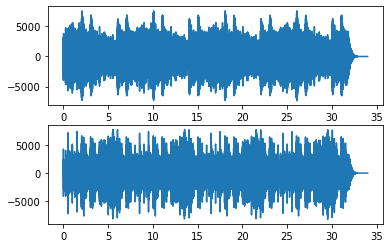

In [16]:
if num_chan == 2:
    plt.plot(t, channel_1, label='Channel 1') 
    plt.plot(t, channel_2, label='Channel 2')
elif num_chan == 1:
    plt.plot(t, channel_1, label='Channel 1')
else:
    raise ValueError("Input channel does not equal 1 or 2. Only Mono and Sterio Channels are supported.")

plt.figure(1)
plt.subplot(211)
plt.plot(t, channel_1)
plt.subplot(212)
plt.plot(t, channel_2)

ax.set_title('Audio Signal Over Time')
ax.set_xlabel('Time in seconds')
ax.set_ylabel('Signal Amplitude')

ax.plot(channel_1, label = 'Channel 1', color = 'blue')
ax.plot(channel_2, label = 'Channel 2', color = 'orange')


ax.legend()

plt.show()